# Lab 8: Define and Solve an ML Problem of Your Choosing

In [3]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [4]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename, header=0)

df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [5]:
df.head(10)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


In [6]:
df.shape

(1562, 19)

In [7]:
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.

World Happiness Report (WHR) data set

2. What will you be predicting? What is the label?


We will predict the "Life Ladder" score. Life Ladder is the label.

3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?


This is a supervised learning problem, specifically a regression problem since the "Life Ladder" score is a continuous variable. And since a continuous value is being predicted, this is not a classification problem.

4. What are your features? (note: this list may change after your explore your data)


Log GDP per capita
Social support
Healthy life expectancy at birth
Freedom to make life choices
Generosity
Perceptions of corruption
Positive affect
Negative affect
Confidence in national government
Democratic Quality
Delivery Quality

5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?


Understanding the factors that contribute to happiness can help governments and organizations implement policies to improve the well-being of their citizens. By predicting the happiness score, companies can see what are the key areas that need attention and investment.



## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

## Exploratory Data Analysis (EDA)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   country                                                   1562 non-null   object 
 1   year                                                      1562 non-null   int64  
 2   Life Ladder                                               1562 non-null   float64
 3   Log GDP per capita                                        1535 non-null   float64
 4   Social support                                            1549 non-null   float64
 5   Healthy life expectancy at birth                          1553 non-null   float64
 6   Freedom to make life choices                              1533 non-null   float64
 7   Generosity                                                1482 non-null   float64
 8   Perceptions of cor

In [9]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


In [10]:
df.isnull().sum()

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

<AxesSubplot: ylabel='Life Ladder'>

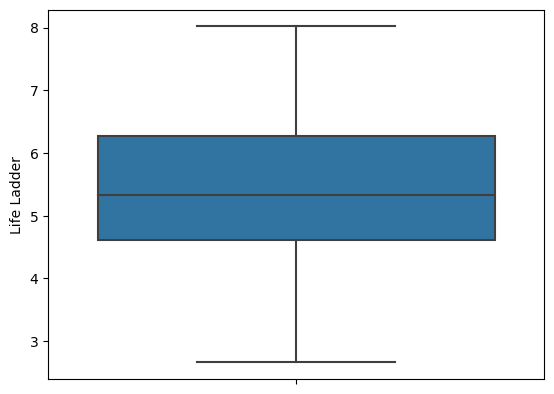

In [11]:
sns.boxplot(y=df['Life Ladder'])

   

<AxesSubplot: ylabel='Log GDP per capita'>

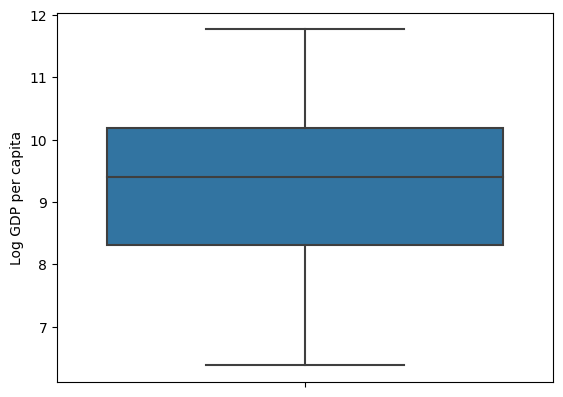

In [12]:
sns.boxplot(y=df['Log GDP per capita'])

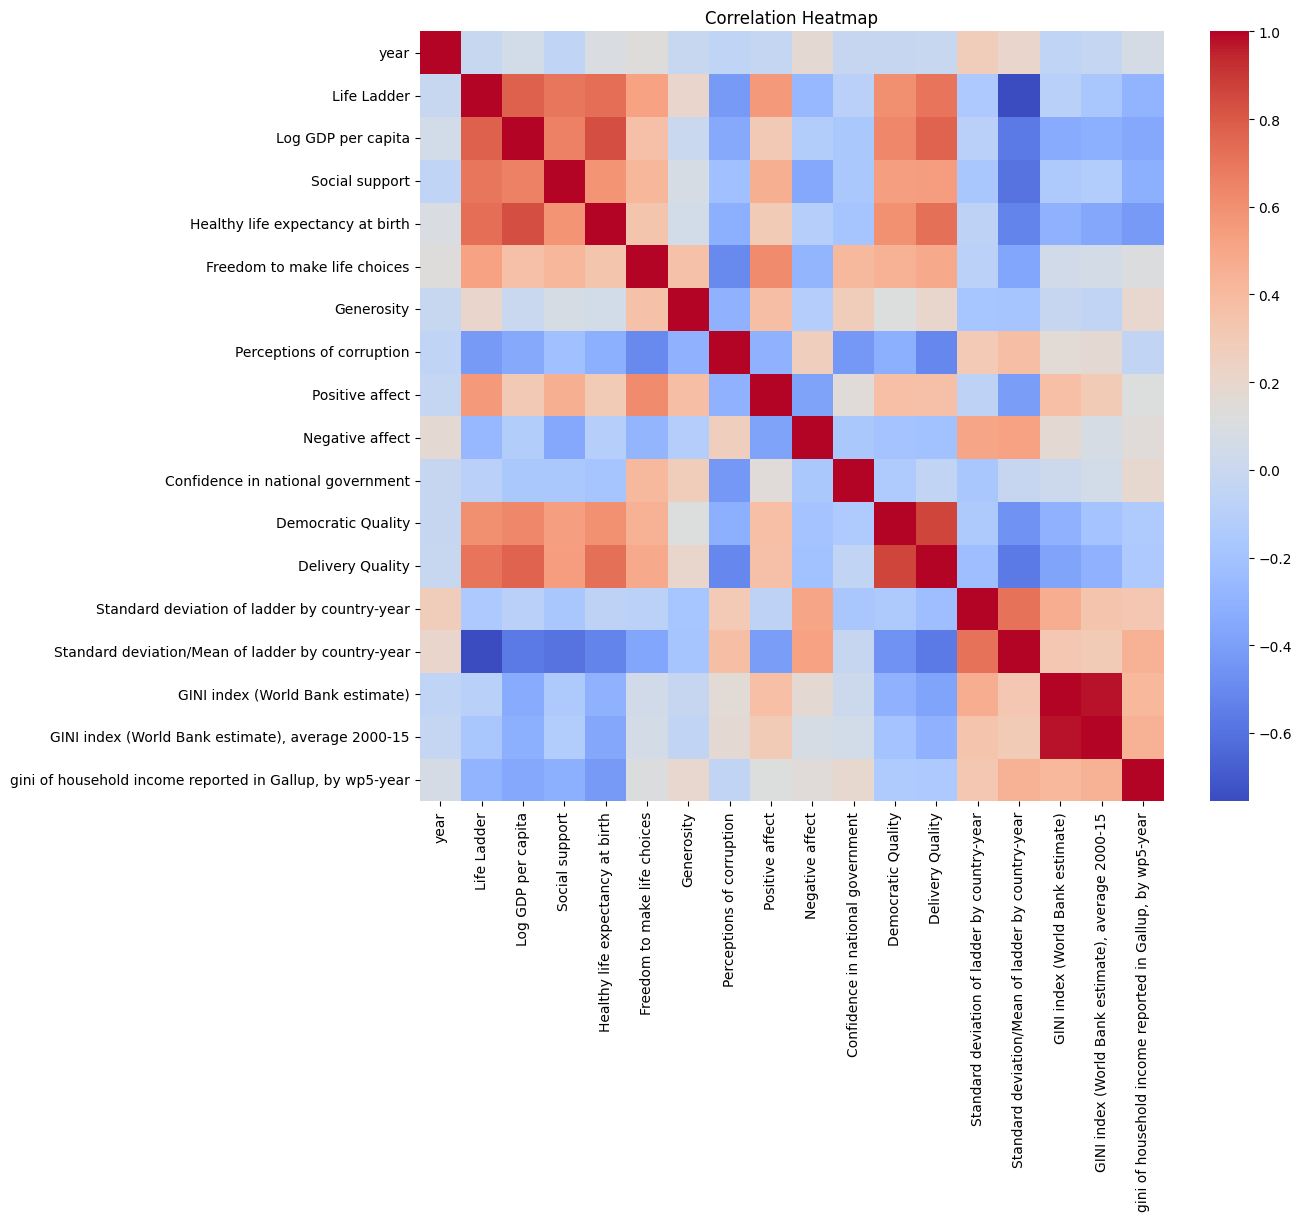

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

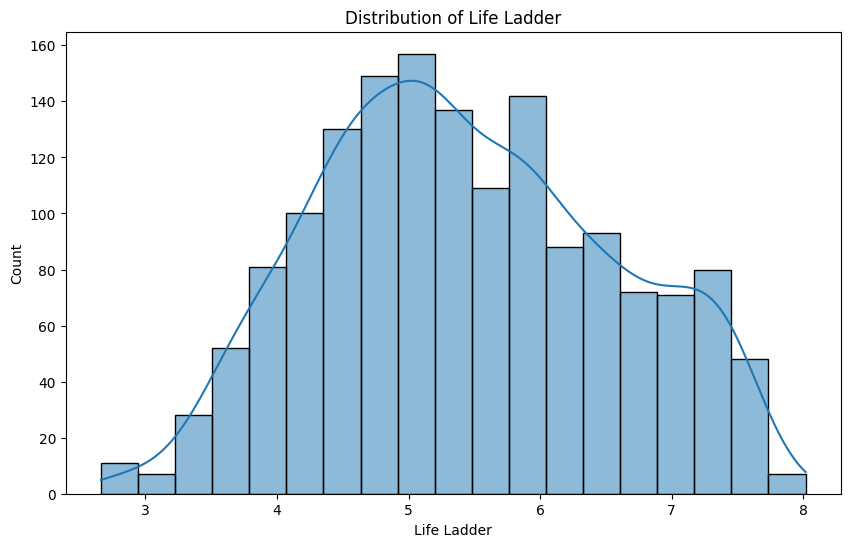

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Life Ladder'], kde=True)
plt.title('Distribution of Life Ladder')
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data?

I'm using these features:
- 'label_log_gdp', 'Social support', 'Healthy life expectancy at birth',
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'

* Explain different data preparation techniques that you will use to prepare your data for modeling.
    - Handle missing values
    - Normalize numerical features if needed
    - Encode categorical features if any (none in this case)

  
* What is your model (or models)?
    1. Linear Regression
    2. Random Forest Regressor
    3. Gradient Boosting Regressor
       
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data.
    - Handling Missing Values: fill missing values with the mean for numerical columns and the mode for categorical columns (in this case don't have to worry but just in case).
    - Outlier Detection: use winsorization for the 'Log GDP per capita' feature to handle any outliers
    - Train models using training data
    - Evaluate performance using the metrics RMSE and R²
    - Perform hyperparameter tuning to improve model performance on Random Forest Regressor and Gradient Boosting Regressor models
 
For improvement:
- I removed all outliers in the data but that ended up making my models perform worse so I removed that from my code
- Also for the hyperparamters, I tried various combinations and the ones I have below work pretty optimally

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [15]:
import scipy.stats as stats

In [16]:
#winsorize Log GDP per capita as it's the most used feature, so any significant 
#outliers can be removed
df['label_log_gdp'] = stats.mstats.winsorize(df['Log GDP per capita'], limits=[0.01, 0.01])


In [17]:
(df['Log GDP per capita']-df['label_log_gdp']).unique()

array([ 0.        , -0.00094986, -0.15969324,         nan, -0.25600386,
       -0.1879077 , -0.15216351, -0.10387468, -0.04622126, -0.01266336,
       -0.02150059, -0.00805855, -0.14591074, -0.11870909, -0.08281374,
       -0.00859451, -0.0039854 ])

In [18]:
#Handles missing values by replacing with mean else, mode
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number):
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

#check

df.isnull().sum()

country                                                     0
year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by country-year           0
GINI ind

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

In [20]:
features = ['label_log_gdp', 'Social support', 'Healthy life expectancy at birth',
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

y = df['Life Ladder']
X = df[features]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [22]:
#For Linear Regression model
#Scaled features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
#Linear Regression model
lr_model = LinearRegression()

#Fit the model to the training data 
lr_model.fit(X_train_scaled, y_train)

#Make predictions on the test data 
y_lr_pred = lr_model.predict(X_test_scaled)

In [24]:
lr_rmse = np.sqrt(mean_squared_error(y_test, y_lr_pred))
lr_r2 = r2_score(y_test, y_lr_pred)

In [25]:
print(f"Root Mean Squared Error (RMSE) for Linear Regression: {lr_rmse}")
print(f"R² Score for Linear Regression: {lr_r2}")


Root Mean Squared Error (RMSE) for Linear Regression: 0.5876194029060794
R² Score for Linear Regression: 0.7289406844925419


In [26]:
#GB Regression model
gb_model = GradientBoostingRegressor()

#parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],  # Adjusted the range to common values
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5, 7]
}

#Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5,
    scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

#Fit GridSearchCV to data
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [27]:
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

Best Model: GradientBoostingRegressor(max_depth=7)


In [28]:
#Predict and evaluate with the best model
gb_y_pred = best_model.predict(X_test)

gb_rmse = np.sqrt(mean_squared_error(y_test, gb_y_pred))
gb_r2 = r2_score(y_test, gb_y_pred)

print(f"Root Mean Squared Error (RMSE) for Gradient Boosting: {gb_rmse}")
print(f"R² Score for Gradient Boosting: {gb_r2}")

Root Mean Squared Error (RMSE) for Gradient Boosting: 0.4738805574933934
R² Score for Gradient Boosting: 0.823717231022575


In [29]:
#Parameter grid for Random Forest model
param_grid = { 
    'n_estimators': [50, 150, 250, 300], 
    'max_depth': [2, 4, 8]
} 

In [34]:
random_search = RandomizedSearchCV(RandomForestRegressor(), 
                                   param_grid) 
random_search.fit(X_train, y_train) 
print(random_search.best_estimator_) 

RandomForestRegressor(max_depth=8, n_estimators=300)


In [38]:
#Random Forest Regression model using 
#RandomForestRegressor(max_depth=8, n_estimators=300)
rf_model = RandomForestRegressor(max_depth=8,
                                      n_estimators=300) 
rf_model.fit(X_train, y_train) 
rf_y_pred = rf_model.predict(X_test) 


In [39]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

In [40]:
print(f"Root Mean Squared Error (RMSE) for Random Forest: {rf_rmse}")
print(f"R² Score for Random Forest: {rf_r2}")

Root Mean Squared Error (RMSE) for Random Forest: 0.4646137170433161
R² Score for Random Forest: 0.8305443173642117


In [41]:
#Plots for all 3 of the models and their respective RMSEs and R2s

metrics = {
    'Linear Regression': {'RMSE': lr_rmse, 'R² Score': lr_r2},
    'Gradient Boosting': {'RMSE': gb_rmse, 'R² Score': gb_r2},
    'Random Forest': {'RMSE': rf_rmse, 'R² Score': rf_r2}
}

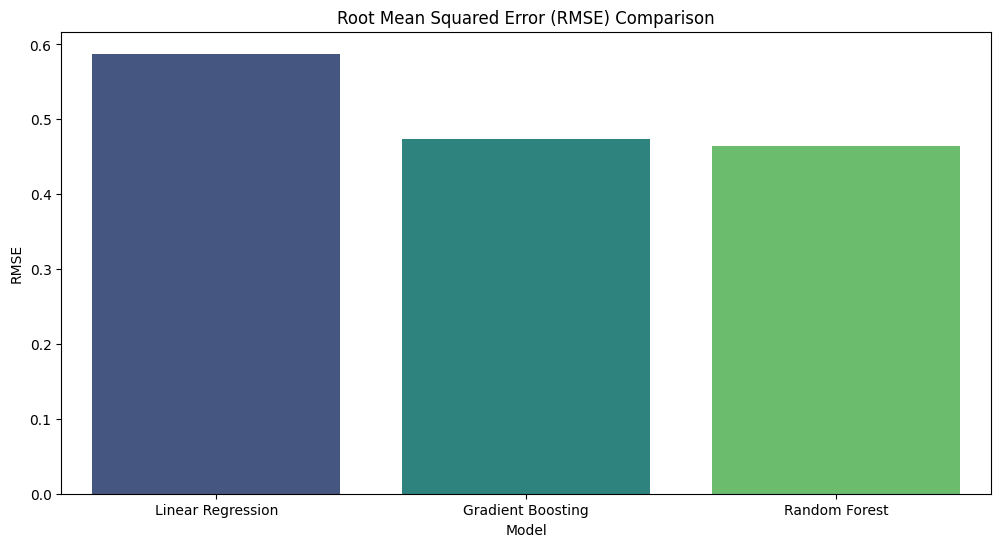

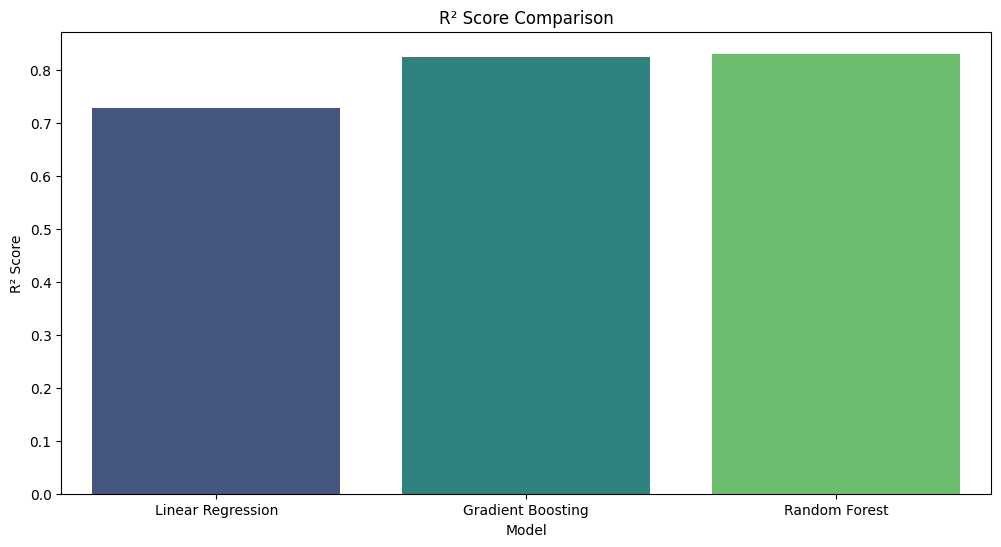

In [43]:
# Convert the metrics dictionary to a DataFrame and transpose,
#so that the models become rows
metrics_df = pd.DataFrame(metrics).T
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={'index': 'Model'}, inplace=True)

#RMSE Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=metrics_df, palette='viridis')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')
plt.show()

#R2 Score Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R² Score', data=metrics_df, palette='viridis')
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.show()

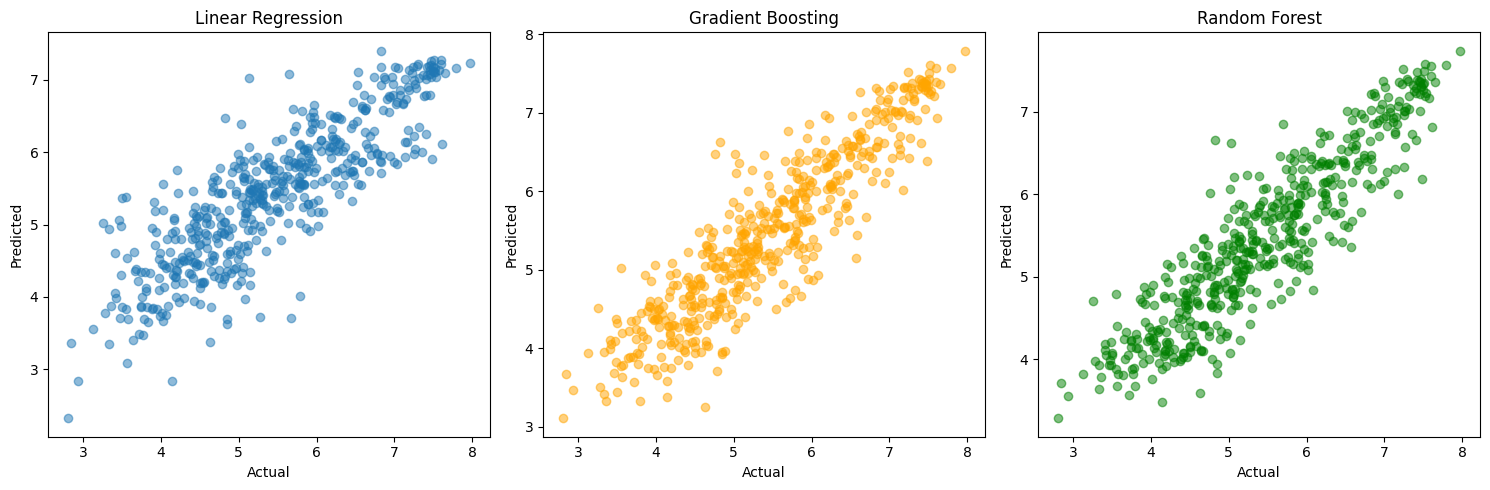

In [44]:
#Predicted vs Actual for Linear Regression Model
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_lr_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

#Predicted vs Actual for Gradient Boosting Model
plt.subplot(1, 3, 2)
plt.scatter(y_test, gb_y_pred, alpha=0.5, color='orange')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting')

#Predicted vs Actual for Random Forest Model
plt.subplot(1, 3, 3)
plt.scatter(y_test, rf_y_pred, alpha=0.5, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

plt.tight_layout()
plt.show()

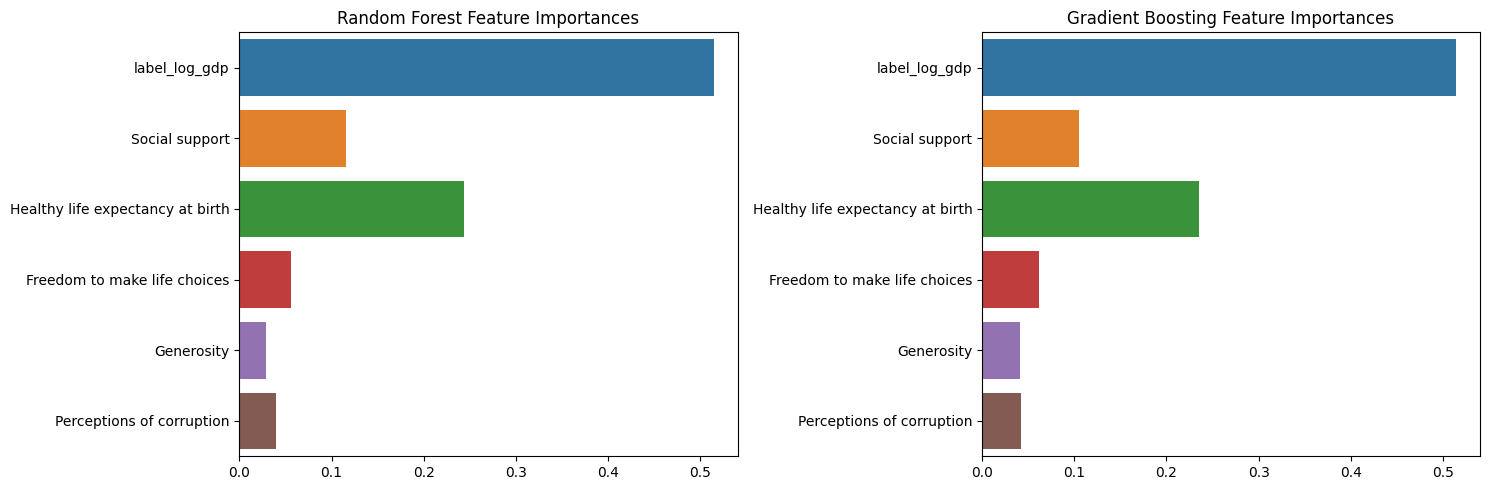

In [48]:
plt.figure(figsize=(15, 5))

#Plots the feature importances from the Random Forest model
plt.subplot(1, 2, 1)
sns.barplot(x=rf_model.feature_importances_, y=features)
plt.title('Random Forest Feature Importances')

#Plots the feature importances from the Gradient Boosting model
plt.subplot(1, 2, 2)
sns.barplot(x=best_model.feature_importances_, y=features)
plt.title('Gradient Boosting Feature Importances')

plt.tight_layout()
plt.show()